In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
campañasIniciales=12

In [3]:
Carpeta=r"C:\Users\williamtorres\OneDrive - CETCO S.A\SAP IBP\Rolling forecast\22.08.2025"

# Venta Corporaritiva

In [4]:
# Lista para guardar los dataframes de cada carpeta
lista_df = []

for subcarpeta in os.listdir(Carpeta+'\Resultado CORP'):
    ruta_subcarpeta = os.path.join(Carpeta+'\Resultado CORP', subcarpeta)
    archivo = os.path.join(ruta_subcarpeta, "VentaCorp.csv")
    # Verifica si es carpeta y si contiene el archivo VentaCorp.csv
    if os.path.isdir(ruta_subcarpeta) and os.path.exists(archivo):
        try:
            df_temp = pd.read_csv(archivo)
            df_temp = df_temp.reset_index().rename(columns={"index": "Campaña"})
            lista_df.append(df_temp)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")

# Concatenar todo en un solo DataFrame
df_ventaCorp = pd.concat(lista_df, ignore_index=True)
df_ventaCorp.tail()



,Campaña,2024,2025,2026,2027,2028
103,13,8239.0,5285.0,5283.708259,5287.956447,5281.340858
104,14,5209.0,7775.0,7773.099662,7779.349362,7769.616873
105,15,8259.0,15446.0,15442.224743,15454.640546,15435.305752
106,16,9730.0,22575.0,22569.482297,22587.628533,22559.369892
107,17,5990.0,4903.0,4901.801626,4905.742755,4899.605341


In [5]:
df_ventaCorp = df_ventaCorp.groupby("Campaña", as_index=False).sum()
df_ventaCorp.head()

,Campaña,2024,2025,2026,2027,2028
0,0,10201132.0,11341249.0,1.181451e+07,1.230759e+07,1.280004e+07
1,1,10969621.0,11827090.0,1.232429e+07,1.284305e+07,1.336182e+07
2,2,10916859.0,11363576.0,1.183392e+07,1.232337e+07,1.281229e+07
3,3,10975691.0,11120895.0,1.158391e+07,1.206631e+07,1.254863e+07
4,4,11261977.0,11789320.0,1.227894e+07,1.278929e+07,1.329950e+07


In [6]:
df_ventaCorp= df_ventaCorp.drop(columns=['Campaña'])


In [7]:
df_ventaCorp.index = range(1, len(df_ventaCorp) + 1)

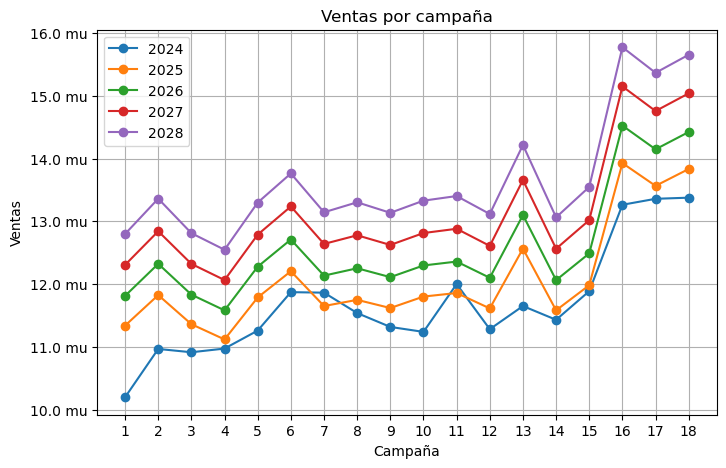

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar: cada columna (año) será una línea, eje X = index
df_ventaCorp.plot(kind='line', marker='o', ax=ax)

# Ajustes de gráfico
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f} mu'))
ax.set_title("Ventas por campaña")
ax.set_xlabel("Campaña")
ax.set_ylabel("Ventas")
ax.set_xticks(range(1, len(df_ventaCorp)+1))  # 0 a 17
ax.grid(True)

plt.show()

# Uniendo Corporativo menos PR

In [9]:
# Lista para guardar los dataframes de cada carpeta
lista_df = []

for subcarpeta in os.listdir(Carpeta+'\Resultado CORP'):
    ruta_subcarpeta = os.path.join(Carpeta+'\Resultado CORP', subcarpeta)
    archivo = os.path.join(ruta_subcarpeta, "Rolling-Forecast.XLSM")
    # Verifica si es carpeta y si contiene el archivo VentaCorp.csv
    if os.path.isdir(ruta_subcarpeta) and os.path.exists(archivo):
        try:
            df_temp = pd.read_excel(archivo, sheet_name='Final')
            lista_df.append(df_temp)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")

# Concatenar todo en un solo DataFrame
df_Linea = pd.concat(lista_df, ignore_index=True)
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,101,0.052837,0.065541,0,200106346,2201,712,772,147,...,2458,2388,2264,2497,2261,2332,2839,2952,2871,202612
1,CO03,101,0.052837,0.065541,0,200118219,31436,13913,11342,16693,...,20810,20221,19173,21146,19144,19743,24037,24996,24310,202612
2,CO03,101,0.052837,0.065541,0,200085806,13404,9835,5037,12633,...,11840,11505,10909,12032,10893,11234,13678,14223,13832,202612
3,CO03,101,0.052837,0.065541,0,200086432,49386,30037,37670,24489,...,40633,39482,37436,41288,37380,38550,46935,48807,47467,202612
4,CO03,101,0.052837,0.065541,0,200091295,6456,5031,6486,4036,...,2902,2820,2674,2949,2670,2754,3353,3487,3391,202612


In [10]:
# Lista para guardar los dataframes de cada carpeta
lista_df = []

for subcarpeta in os.listdir(Carpeta+'\Resultado CORP'):
    ruta_subcarpeta = os.path.join(Carpeta+'\Resultado CORP', subcarpeta)
    archivo = os.path.join(ruta_subcarpeta, "novoAppForecast.XLSM")
    # Verifica si es carpeta y si contiene el archivo VentaCorp.csv
    if os.path.isdir(ruta_subcarpeta) and os.path.exists(archivo):
        try:
            df_temp = pd.read_excel(archivo, sheet_name='Final')
            lista_df.append(df_temp)
        except Exception as e:
            print(f"Error leyendo {archivo}: {e}")

df_NovoApp = pd.concat(lista_df, ignore_index=True)
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,NO HAY DATOS PARA PROCESAR
0,BO03,101.0,0.053188,0.050226,0.0,200113784.0,1565.0,247.0,621.0,477.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
1,BO03,101.0,0.053188,0.050226,0.0,200115806.0,629.0,1596.0,679.0,2113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
2,BO03,101.0,0.053188,0.050226,0.0,200115811.0,1067.0,620.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
3,BO03,101.0,0.053188,0.050226,0.0,200115814.0,1921.0,759.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
4,BO03,101.0,0.053188,0.050226,0.0,200116520.0,231.0,177.0,681.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN


In [11]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202810,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling
0,CO03,101,200106346,2201,712,772,147,203,2968,851,...,2458,2388,2264,2497,2261,2332,2839,2952,2871,202612
1,CO03,101,200118219,31436,13913,11342,16693,9654,6905,27829,...,20810,20221,19173,21146,19144,19743,24037,24996,24310,202612
2,CO03,101,200085806,13404,9835,5037,12633,7791,10285,12811,...,11840,11505,10909,12032,10893,11234,13678,14223,13832,202612
3,CO03,101,200086432,49386,30037,37670,24489,73500,15588,23746,...,40633,39482,37436,41288,37380,38550,46935,48807,47467,202612
4,CO03,101,200091295,6456,5031,6486,4036,8161,4312,1846,...,2902,2820,2674,2949,2670,2754,3353,3487,3391,202612


In [12]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,NO HAY DATOS PARA PROCESAR
0,BO03,101.0,200113784.0,1565.0,247.0,621.0,477.0,1831.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
1,BO03,101.0,200115806.0,629.0,1596.0,679.0,2113.0,634.0,1036.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
2,BO03,101.0,200115811.0,1067.0,620.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
3,BO03,101.0,200115814.0,1921.0,759.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
4,BO03,101.0,200116520.0,231.0,177.0,681.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN


In [13]:
df_PronosticoCOR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [14]:
df_PronosticoCOR.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,NO HAY DATOS PARA PROCESAR
0,BO03,101.0,200113784.0,1565.0,247.0,621.0,477.0,1831.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
1,BO03,101.0,200115806.0,629.0,1596.0,679.0,2113.0,634.0,1036.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
2,BO03,101.0,200115811.0,1067.0,620.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
3,BO03,101.0,200115814.0,1921.0,759.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN
4,BO03,101.0,200116520.0,231.0,177.0,681.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,202612.0,NaN


# Uniendo  PR

In [15]:
df_Linea=  pd.read_excel(Carpeta+'\\Resultado PR03\\PR\\Rolling-Forecast.XLSM', sheet_name='Final')
df_Linea.head()

,Ce.,Grupo art.,Crecimiento X+1,Crecimiento X,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,0.052837,0.065541,0,200098673,263,208,192,242,...,363,313,285,273,282,293,319,408,364,202603
1,PR03,101,0.052837,0.065541,0,200109443,199,112,103,130,...,195,168,153,147,152,158,172,220,196,202603
2,PR03,101,0.052837,0.065541,0,200111145,33,400,370,466,...,705,608,553,530,547,568,619,791,706,202603
3,PR03,101,0.052837,0.065541,0,200113548,37,41,38,48,...,73,63,57,55,57,59,64,82,73,202603
4,PR03,101,0.052837,0.065541,0,200093883,38,213,197,248,...,375,323,294,282,291,302,329,420,375,202603


In [16]:
df_NovoApp=  pd.read_excel(Carpeta+'\\Resultado PR03\\PR\\novoAppForecast.XLSM', sheet_name='Final')
df_NovoApp.head()

,Ce.,Grupo art.,Crecimiento X+2,Crecimiento X+3,Camapaña Descontinuación,Código SAP,202601,202602,202603,202604,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,0.053188,0.050226,0,200115806,229,229,229,229,...,253,253,253,253,253,253,253,253,253,202609
1,PR03,101,0.053188,0.050226,0,200117098,91,91,91,91,...,101,101,101,101,101,101,101,101,101,202608
2,PR03,101,0.053188,0.050226,0,200117127,95,95,95,95,...,105,105,105,105,105,105,105,105,105,202606
3,PR03,101,0.053188,0.050226,0,200117264,260,260,260,260,...,288,288,288,288,288,288,288,288,288,202609
4,PR03,101,0.053188,0.050226,0,200120242,0,0,0,0,...,336,336,336,336,336,336,336,336,336,202706


In [17]:
df_Linea = df_Linea.drop(df_Linea.columns[[2, 3, 4]], axis=1)
df_Linea.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,200098673,263,208,192,242,313,274,269,...,363,313,285,273,282,293,319,408,364,202603
1,PR03,101,200109443,199,112,103,130,168,147,144,...,195,168,153,147,152,158,172,220,196,202603
2,PR03,101,200111145,33,400,370,466,604,529,520,...,705,608,553,530,547,568,619,791,706,202603
3,PR03,101,200113548,37,41,38,48,62,54,53,...,73,63,57,55,57,59,64,82,73,202603
4,PR03,101,200093883,38,213,197,248,321,281,276,...,375,323,294,282,291,302,329,420,375,202603


In [18]:
df_NovoApp = df_NovoApp.drop(df_NovoApp.columns[[2, 3, 4]], axis=1)
df_NovoApp.head()

,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202805,202806,202807,202808,202809,202810,202811,202812,202813,Campaña Inicio Rolling
0,PR03,101,200115806,229,229,229,229,229,229,229,...,253,253,253,253,253,253,253,253,253,202609
1,PR03,101,200117098,91,91,91,91,91,91,91,...,101,101,101,101,101,101,101,101,101,202608
2,PR03,101,200117127,95,95,95,95,95,95,95,...,105,105,105,105,105,105,105,105,105,202606
3,PR03,101,200117264,260,260,260,260,260,260,260,...,288,288,288,288,288,288,288,288,288,202609
4,PR03,101,200120242,0,0,0,0,334,1617,279,...,336,336,336,336,336,336,336,336,336,202706


In [19]:
df_NovoApp['Grupo art.'].unique()

array([101, 102, 105, 104], dtype=int64)

In [20]:
df_PronosticoPR= pd.concat([df_NovoApp, df_Linea], ignore_index=True)

In [21]:
df_PronosticoPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ce.                     944 non-null    object
 1   Grupo art.              944 non-null    int64 
 2   Código SAP              944 non-null    int64 
 3   202601                  944 non-null    int64 
 4   202602                  944 non-null    int64 
 5   202603                  944 non-null    int64 
 6   202604                  944 non-null    int64 
 7   202605                  944 non-null    int64 
 8   202606                  944 non-null    int64 
 9   202607                  944 non-null    int64 
 10  202608                  944 non-null    int64 
 11  202609                  944 non-null    int64 
 12  202610                  944 non-null    int64 
 13  202611                  944 non-null    int64 
 14  202612                  944 non-null    int64 
 15  202613

# Uniendo PR y COR

In [22]:
df_Pronostico = pd.concat([df_PronosticoCOR, df_PronosticoPR], ignore_index=True, sort=False)

In [23]:
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18717 entries, 0 to 18716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ce.                         18717 non-null  object 
 1   Grupo art.                  18717 non-null  float64
 2   Código SAP                  18717 non-null  float64
 3   202601                      18717 non-null  float64
 4   202602                      18717 non-null  float64
 5   202603                      18717 non-null  float64
 6   202604                      18717 non-null  float64
 7   202605                      18717 non-null  float64
 8   202606                      18717 non-null  float64
 9   202607                      18717 non-null  float64
 10  202608                      18717 non-null  float64
 11  202609                      18717 non-null  float64
 12  202610                      18717 non-null  float64
 13  202611                      187

In [24]:
df_Pronostico=df_Pronostico.fillna(0)
df_Pronostico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18717 entries, 0 to 18716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ce.                         18717 non-null  object 
 1   Grupo art.                  18717 non-null  float64
 2   Código SAP                  18717 non-null  float64
 3   202601                      18717 non-null  float64
 4   202602                      18717 non-null  float64
 5   202603                      18717 non-null  float64
 6   202604                      18717 non-null  float64
 7   202605                      18717 non-null  float64
 8   202606                      18717 non-null  float64
 9   202607                      18717 non-null  float64
 10  202608                      18717 non-null  float64
 11  202609                      18717 non-null  float64
 12  202610                      18717 non-null  float64
 13  202611                      187

# Limpiando Data

In [25]:
Categoria=df_Pronostico['Grupo art.'].unique()
print(Categoria)
CDP=df_Pronostico['Ce.'].unique()
print(CDP)

[101. 102. 103. 104. 105. 106.]
['BO03' 'CL03' 'CO03' 'CR03' 'DO03' 'EC03' 'GT23' 'MX03' 'PA33' 'PE03'
 'SV13' 'PR03']


In [26]:
añoActual = datetime.now().year

In [27]:
df_Pronostico.columns = df_Pronostico.columns.astype(str)

In [28]:
# Iterar sobre los años desde el año actual hasta 4 años después
for i in range(añoActual, añoActual + 4):  # +5 para incluir hasta añoActual + 4
    # Filtrar columnas que inician con el año actual en la iteración
    columnas_AñoX = [col for col in df_Pronostico.columns if col.startswith(str(i))]
    
    # Si hay columnas de ese año, sumarlas en una nueva columna
    if columnas_AñoX:
        df_Pronostico['Total_' + str(i)] = df_Pronostico[columnas_AñoX].sum(axis=1)


In [29]:
# Mostrar el DataFrame actualizado
df_Pronostico.head()


,Ce.,Grupo art.,Código SAP,202601,202602,202603,202604,202605,202606,202607,...,202814,202815,202816,202817,202818,Campaña Inicio Rolling,NO HAY DATOS PARA PROCESAR,Total_2026,Total_2027,Total_2028
0,BO03,101.0,200113784.0,1565.0,247.0,621.0,477.0,1831.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,202612.0,0,4741.0,0.0,0.0
1,BO03,101.0,200115806.0,629.0,1596.0,679.0,2113.0,634.0,1036.0,0.0,...,0.0,0.0,0.0,0.0,0.0,202612.0,0,6687.0,0.0,0.0
2,BO03,101.0,200115811.0,1067.0,620.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,202612.0,0,1687.0,0.0,0.0
3,BO03,101.0,200115814.0,1921.0,759.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,202612.0,0,2680.0,0.0,0.0
4,BO03,101.0,200116520.0,231.0,177.0,681.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,202612.0,0,1089.0,0.0,0.0


# Calculando Total por Categoría

In [30]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Grupo art.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Grupo art.,,,
101.0,79616461.0,86117994.0,90425075.0
102.0,67567395.0,73803785.0,77114727.0
103.0,44210632.0,44998574.0,45124979.0
104.0,16878181.0,20218610.0,21982707.0
105.0,12290560.0,11722110.0,11755020.0


In [31]:
Traduciones = {
    "Grupo art.": [101, 102, 103, 104, 105, 106],
    "Categoría": [
        "Fragancias",
        "Maquillaje",
        "Cuidado Personal",
        "Tratamiento Facial",
        "Tratamiento Corporal",
        "Accesorios Cosméticos",
    ],
}
df_Traducciones = pd.DataFrame(Traduciones)
tabla_final = tabla_pivot_Pronostico.merge(df_Traducciones, on="Grupo art.", how="left")

In [32]:
tabla_final = tabla_final.set_index("Categoría")[Valores]
tabla_pivot_Pronostico=tabla_final

In [33]:
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Categoría,,,
Fragancias,79616461.0,86117994.0,90425075.0
Maquillaje,67567395.0,73803785.0,77114727.0
Cuidado Personal,44210632.0,44998574.0,45124979.0
Tratamiento Facial,16878181.0,20218610.0,21982707.0
Tratamiento Corporal,12290560.0,11722110.0,11755020.0


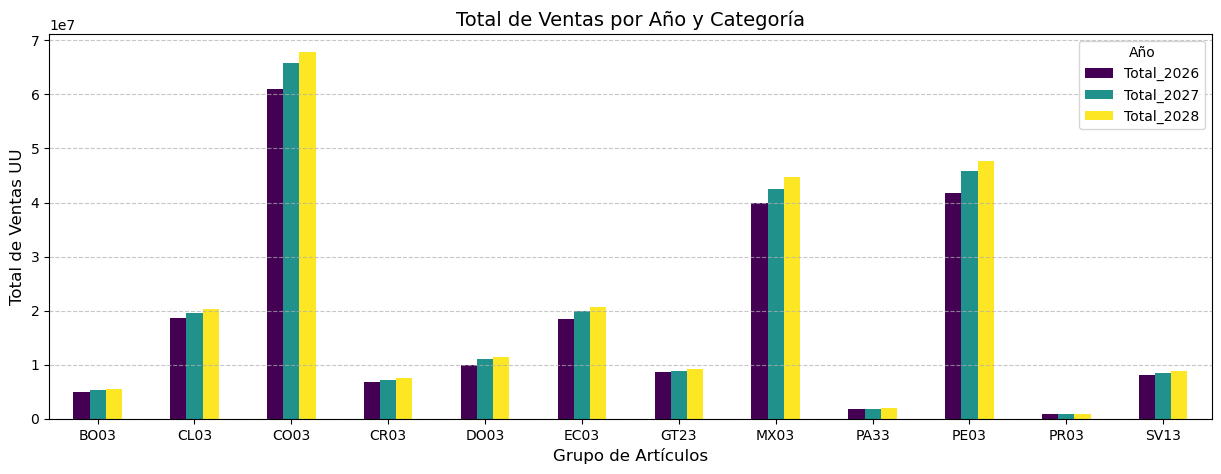

In [41]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f} mu'))
# Personalizar la gráfica
plt.title('Total de Ventas por Año y Categoría', fontsize=14)
plt.xlabel('Grupo de Artículos', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Mostrar la gráfica
plt.show()

# Calculando por CDP

In [35]:
Valores=['Total_'+str(añoActual+1),'Total_'+str(añoActual+2),'Total_'+str(añoActual+3)]
tabla_pivot_Pronostico = df_Pronostico.pivot_table(
    index='Ce.',  # Índice (Filas)
    values=Valores,  # Valores a mostrar
    aggfunc='sum'  # Función de agregación (suma por defecto)
)
tabla_pivot_Pronostico.head()

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,4866864.0,5378065.0,5572614.0
CL03,18583615.0,19481875.0,20371709.0
CO03,61064058.0,65741139.0,67839317.0
CR03,6745924.0,7161079.0,7489563.0
DO03,9998751.0,11058835.0,11467763.0


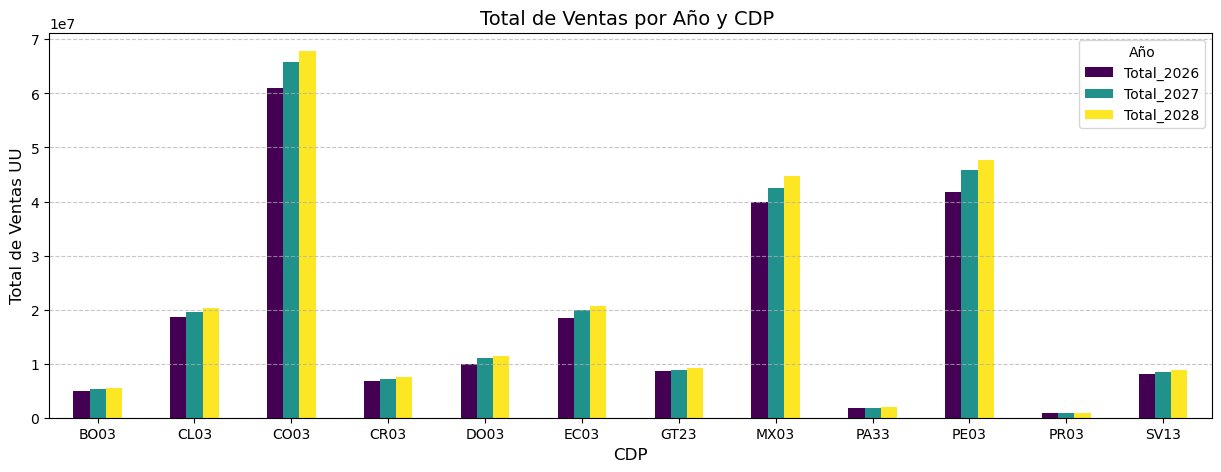

In [36]:
# Graficar la tabla dinámica
tabla_pivot_Pronostico.plot(kind='bar', figsize=(15, 5), colormap='viridis')

# Personalizar la gráfica
plt.title('Total de Ventas por Año y CDP ', fontsize=14)
plt.xlabel('CDP', fontsize=12)
plt.ylabel('Total de Ventas UU', fontsize=12)
plt.xticks(rotation=0)  # Mantener etiquetas de categorías horizontales
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

In [37]:
tabla_pivot_Pronostico

,Total_2026,Total_2027,Total_2028
Ce.,,,
BO03,4866864.0,5378065.0,5572614.0
CL03,18583615.0,19481875.0,20371709.0
CO03,61064058.0,65741139.0,67839317.0
CR03,6745924.0,7161079.0,7489563.0
DO03,9998751.0,11058835.0,11467763.0
EC03,18390248.0,19892544.0,20639710.0
GT23,8692269.0,8761060.0,9166163.0
MX03,39984062.0,42422729.0,44655990.0
PA33,1765287.0,1883291.0,1975809.0


# Calculando códigos activos por campaña y categoría

In [38]:
df_agrupado = df_PronosticoCOR.groupby(["Código SAP"]).sum().reset_index()

In [39]:
df_agrupado.head()

,Código SAP,Ce.,Grupo art.,202601,202602,202603,202604,202605,202606,202607,...,202811,202812,202813,202814,202815,202816,202817,202818,Campaña Inicio Rolling,NO HAY DATOS PARA PROCESAR
0,200036215.0,CO03PE03CL03BO03CR03DO03,636.0,2488.0,0.0,0.0,0.0,0.0,104.0,0.0,...,2399.0,4938.0,53985.0,5281.0,7770.0,15435.0,22559.0,4900.0,1215672.0,0
1,200039855.0,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111.0,121454.0,111159.0,91746.0,130606.0,116050.0,175327.0,47202.0,...,153243.0,145304.0,160256.0,145088.0,149627.0,182174.0,189438.0,184236.0,2228732.0,0
2,200041645.0,MX03EC03GT23SV13,424.0,1450.0,0.0,0.0,0.0,0.0,353.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,810448.0,0
3,200060753.0,MX03,101.0,1000.0,2630.0,1111.0,5005.0,1946.0,3795.0,4769.0,...,4376.0,4149.0,4576.0,4143.0,4273.0,5202.0,5409.0,5260.0,202612.0,0
4,200060760.0,CO03PE03MX03EC03CL03BO03GT23SV13CR03DO03PA33,1111.0,39193.0,33736.0,40368.0,28855.0,44126.0,34663.0,27062.0,...,51398.0,48735.0,53751.0,48664.0,50188.0,61104.0,63541.0,61794.0,2228732.0,0


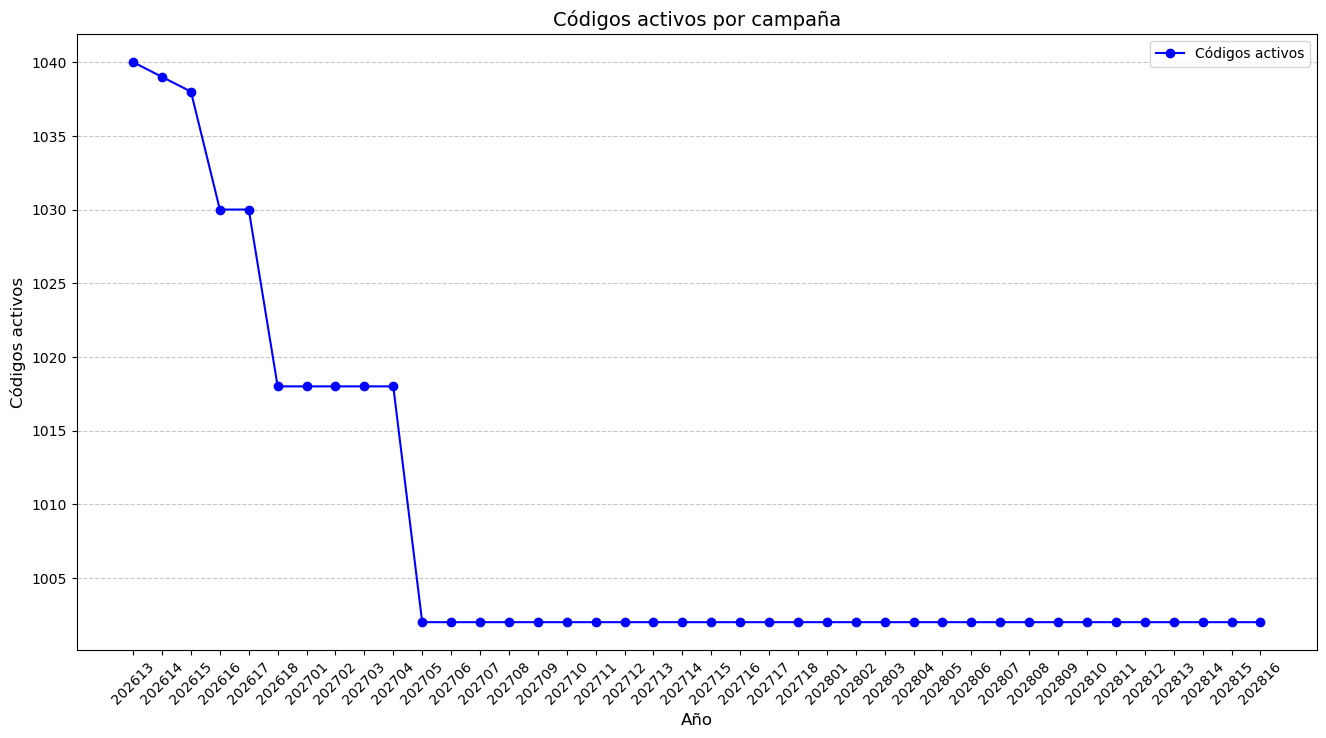

In [40]:

# Contar valores diferentes de 0 por columna
conteo_no_ceros = (df_agrupado.iloc[:, 3+campañasIniciales:] != 0).sum()
conteo_no_ceros = conteo_no_ceros[:-4]
conteo_no_ceros.index = conteo_no_ceros.index.astype(str)
# Crear la gráfica de línea
# FORZAR que se muestren todas las etiquetas en el eje X

plt.figure(figsize=(16, 8))
plt.plot(conteo_no_ceros.index, conteo_no_ceros, marker='o', color='b', label="Códigos activos")
plt.title("Códigos activos por campaña", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Códigos activos", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Mostrar la gráfica
plt.show()